**Source**

In [1]:
#Kaggle:
#https://www.kaggle.com/datasets/hsankesara/portland-oregon-avg-rider-monthly-data

#Internet:
#https://puneet166.medium.com/time-series-forecasting-how-to-predict-future-data-using-arma-arima-and-sarima-model-8bd20597cc7b

#Differencing:
#https://otexts.com/fpp2/stationarity.html

**Preprocessing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


In [3]:
df=pd.read_csv('portland-oregon-data.csv')

In [4]:
df.shape

(115, 2)

In [5]:
df.head(5)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [6]:
df.tail(5)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,Portland Oregon average monthly bus ridership ...,n=114


In [7]:
#remove the last line
df=df[:114]
df.tail(5)

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
109,1969-02,1425
110,1969-03,1419
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327


In [8]:
#rename the column
df = df.rename(columns = 
{'Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114' : 'avg_monthly_ridership'},
inplace = False)


df = df.rename(columns = 
{'Month' : 'date'},
inplace = False)

In [9]:
#check for nulls
df.isnull().sum()

date                     0
avg_monthly_ridership    0
dtype: int64

In [10]:
df.dtypes

date                     object
avg_monthly_ridership    object
dtype: object

In [11]:
#convert data from string to INT64 and Datetime

#convert column into a datatime
df['date']=pd.to_datetime(df['date'], errors='coerce', format='%Y-%m')
#data['date'] = data['date'].dt.strftime('%Y-%m')

#convert column into integer
df['avg_monthly_ridership']=df['avg_monthly_ridership'].astype('int64')

In [12]:
df=df.set_index('date')
df.head(5)

,avg_monthly_ridership
date,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [13]:
#check the dtype of columns
df.dtypes

avg_monthly_ridership    int64
dtype: object

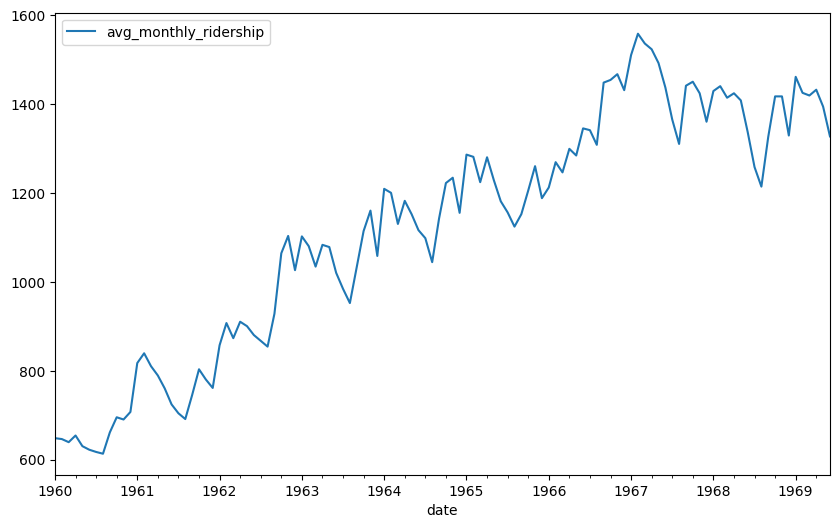

In [14]:
#plot the data
df.plot(figsize=(10,6))
plt.show()

**Check stationarity**

In [15]:
#define function for Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def df_test(df_column):
    dftest = adfuller(df_column.dropna()) #drop if tested data contains NaNs
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    #print final statement about the test
    if dfoutput['Test Statistic']>=dfoutput['Critical Value (5%)']:
        print('Data are NON-STATIONARY!!!')
    else:
        print('Data are STATIONARY.')

In [16]:
#Perform DF test
df_test(df['avg_monthly_ridership'])

Test Statistic         -1.536597
p-value                 0.515336
Critical Value (1%)    -3.496818
Critical Value (5%)    -2.890611
Critical Value (10%)   -2.582277
dtype: float64
Data are NON-STATIONARY!!!


**Make Data Stationary**

In [17]:
#1st order differencing 
df['avg_monthly_ridership-diff-1st']=df['avg_monthly_ridership']-df['avg_monthly_ridership'].shift(1)
df.head(5)

,avg_monthly_ridership,avg_monthly_ridership-diff-1st
date,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0


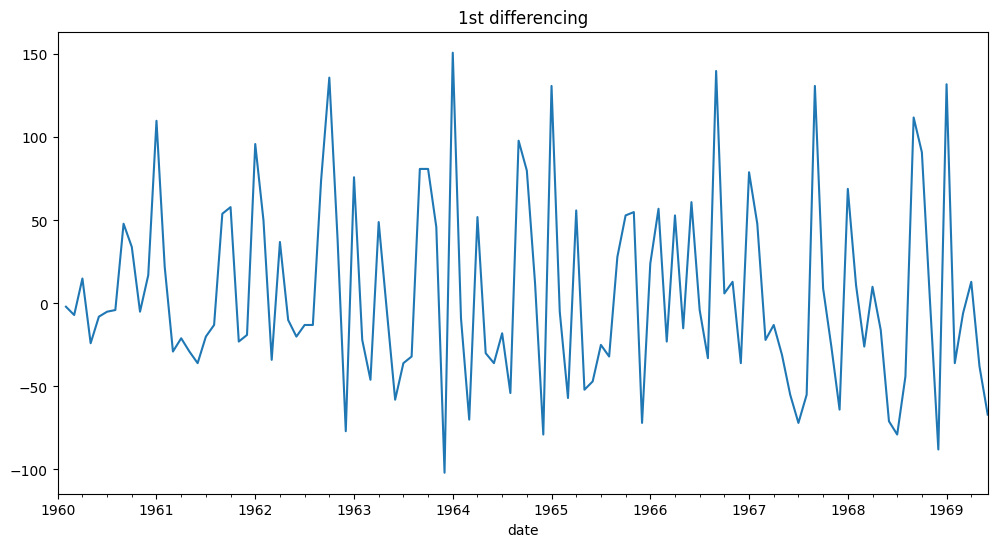

In [18]:
#plot the result
df['avg_monthly_ridership-diff-1st'].plot(figsize=(12,6),title='1st differencing')

plt.show()

In [19]:
#Perform DF test
df_test(df['avg_monthly_ridership-diff-1st'])

Test Statistic         -1.938696
p-value                 0.314082
Critical Value (1%)    -3.496818
Critical Value (5%)    -2.890611
Critical Value (10%)   -2.582277
dtype: float64
Data are NON-STATIONARY!!!


In [20]:
#2nd order differencing 
df['avg_monthly_ridership-diff-2nd']=df['avg_monthly_ridership-diff-1st']-df['avg_monthly_ridership-diff-1st'].shift(1)
df.head(5)

,avg_monthly_ridership,avg_monthly_ridership-diff-1st,avg_monthly_ridership-diff-2nd
date,,,
1960-01-01,648,NaN,NaN
1960-02-01,646,-2.0,NaN
1960-03-01,639,-7.0,-5.0
1960-04-01,654,15.0,22.0
1960-05-01,630,-24.0,-39.0


In [21]:
#Perform DF test
df_test(df['avg_monthly_ridership-diff-2nd'])

Test Statistic         -1.247869e+01
p-value                 3.126378e-23
Critical Value (1%)    -3.496818e+00
Critical Value (5%)    -2.890611e+00
Critical Value (10%)   -2.582277e+00
dtype: float64
Data are STATIONARY.


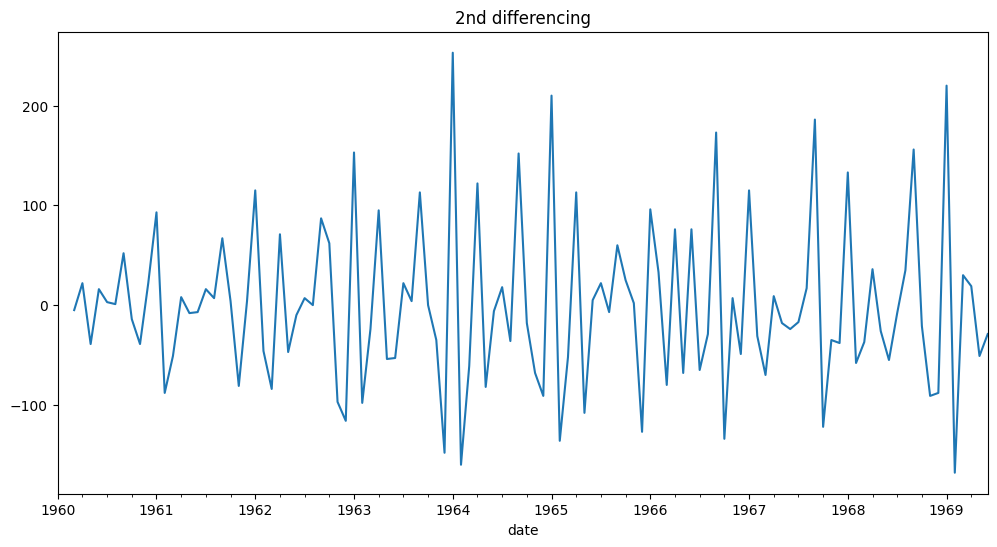

In [22]:
#plot the result
df['avg_monthly_ridership-diff-2nd'].plot(figsize=(12,6), title='2nd differencing')

plt.show()

**Choose parameters for ARIMA/SARIMA**

In [23]:
#drop NaN created during the differencing process
df=df.dropna()
df.head(5)

,avg_monthly_ridership,avg_monthly_ridership-diff-1st,avg_monthly_ridership-diff-2nd
date,,,
1960-03-01,639,-7.0,-5.0
1960-04-01,654,15.0,22.0
1960-05-01,630,-24.0,-39.0
1960-06-01,622,-8.0,16.0
1960-07-01,617,-5.0,3.0


d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


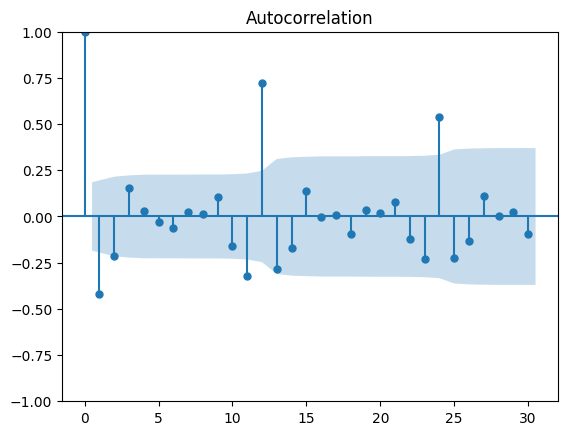

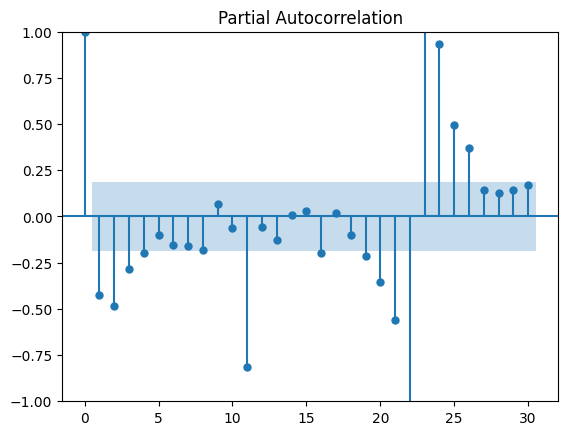

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#get q parameter from autocorelation
plot_acf(df['avg_monthly_ridership-diff-2nd'],lags=30)

#get p parameter from partial correlation
plot_pacf(df['avg_monthly_ridership-diff-2nd'],lags=30); #without semicolon it would be printed twice

**Define model and fit**

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


#define the model
#order (p, d, q) (P, D, Q)m
#we got p and q from the autocorellation charts
#we choose d on the base how many 2 differencing we did (d=1=1st differencing, d=2=2nd differencing)
#m = periodicity,  i.e. the number of periods in season, 12 for monthly data, 7 for weekly data, etc.


model_ar=ARIMA(df['avg_monthly_ridership'],order=(2,2,2))
model_sar=SARIMAX(df['avg_monthly_ridership'],order=(2,2,2),seasonal_order=(2,2,2,12))



d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init

In [26]:
#fit the model
result_sar=model_sar.fit()
result_ar=model_ar.fit()

d:\BackUP\py_venv\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Compare prediction with real data**

In [27]:
df.shape

(112, 3)

In [28]:
#define the start and end
length_test_sample = 15
start=len(df)-length_test_sample-1
end=len(df)-1

print(f' start: {start} \n end: {end} \n delta: {end-start}')

 start: 96 
 end: 111 
 delta: 15


In [29]:
prediction_test=pd.DataFrame()
prediction_test['Real']=df['avg_monthly_ridership'].iloc[-length_test_sample:]

prediction_test['Predicted-Arima']=result_ar.predict(start=start, end=end, dynamic=True)
prediction_test['Predicted-Sarima']=result_sar.predict(start=start, end=end, dynamic=True)

In [30]:
prediction_test.head(5)

,Real,Predicted-Arima,Predicted-Sarima
date,,,
1968-04-01,1424,1443.422809,1405.575505
1968-05-01,1408,1454.934567,1369.501393
1968-06-01,1337,1461.836640,1333.568206
1968-07-01,1258,1469.783956,1257.835232
1968-08-01,1214,1478.578476,1193.290247


In [31]:
#check for NaN
prediction_test.isnull().sum()

Real                0
Predicted-Arima     0
Predicted-Sarima    0
dtype: int64

In [32]:
#remove NaN
prediction_test.dropna(inplace=True)
prediction_test.isnull().sum()

Real                0
Predicted-Arima     0
Predicted-Sarima    0
dtype: int64

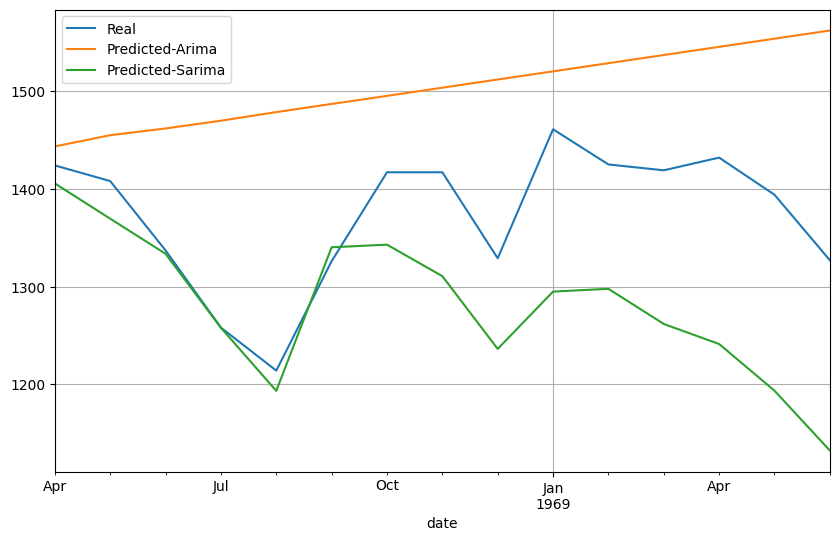

In [33]:
prediction_test[['Real', 'Predicted-Arima', 'Predicted-Sarima']].plot(figsize=(10, 6))
plt.grid(True)

**Calculate RMSE**

In [34]:
rmse_ar=np.sqrt(mean_squared_error(prediction_test['Predicted-Arima'],prediction_test['Real']))
rmse_sar=np.sqrt(mean_squared_error(prediction_test['Predicted-Sarima'],prediction_test['Real']))

print(f' RMSE-Arima {round(rmse_ar,2)} \n RMSE-Sarima {round(rmse_sar,2)}')

 RMSE-Arima 147.83 
 RMSE-Sarima 118.6


**Create new Datetime**

In [35]:
#get the last row of the dataset
df.tail(1)

,avg_monthly_ridership,avg_monthly_ridership-diff-1st,avg_monthly_ridership-diff-2nd
date,,,
1969-06-01,1327,-67.0,-29.0


In [36]:
#get first index of the dataset
start=df.index[len(df)-1]
start

Timestamp('1969-06-01 00:00:00')

In [37]:
from dateutil.relativedelta import relativedelta

n_predictions=12

#convert string into datetime
#start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d") 

#create date list for next 12 months
date_list = [start + relativedelta(months=x) for x in range(0,n_predictions)]

#
future_prediction = pd.DataFrame(index=date_list, columns= df.columns)

#merge 2 datetimes 
data = pd.concat([df, future_prediction])

In [38]:
data.tail(13)

,avg_monthly_ridership,avg_monthly_ridership-diff-1st,avg_monthly_ridership-diff-2nd
1969-06-01,1327,-67.0,-29.0
1969-06-01,NaN,NaN,NaN
1969-07-01,NaN,NaN,NaN
1969-08-01,NaN,NaN,NaN
1969-09-01,NaN,NaN,NaN
1969-10-01,NaN,NaN,NaN
1969-11-01,NaN,NaN,NaN
1969-12-01,NaN,NaN,NaN
1970-01-01,NaN,NaN,NaN
1970-02-01,NaN,NaN,NaN


**Predict next 12 months**

In [39]:
#define the start and end
length_test_sample = 12
start_pred=len(df)
end_pred=len(df) + n_predictions

print(f' start: {start_pred} \n end: {end_pred} \n delta: {end_pred-start_pred}')

 start: 112 
 end: 124 
 delta: 12


In [40]:
data['future_prediction-Arima']=result_ar.predict(start=start_pred, end=end_pred, dynamic=True)
data['future_prediction-Sarima']=result_sar.predict(start=start_pred, end=end_pred, dynamic=True)

In [41]:
data.tail(13)

,avg_monthly_ridership,avg_monthly_ridership-diff-1st,avg_monthly_ridership-diff-2nd,future_prediction-Arima,future_prediction-Sarima
1969-06-01,1327,-67.0,-29.0,NaN,NaN
1969-06-01,NaN,NaN,NaN,NaN,NaN
1969-07-01,NaN,NaN,NaN,1347.969810,1229.025631
1969-08-01,NaN,NaN,NaN,1368.372847,1177.443790
1969-09-01,NaN,NaN,NaN,1368.184860,1290.763836
1969-10-01,NaN,NaN,NaN,1372.829956,1372.561751
1969-11-01,NaN,NaN,NaN,1381.221978,1365.847035
1969-12-01,NaN,NaN,NaN,1387.620439,1264.077560
1970-01-01,NaN,NaN,NaN,1393.591350,1382.886217
1970-02-01,NaN,NaN,NaN,1400.129406,1350.789941


**Plot the results**

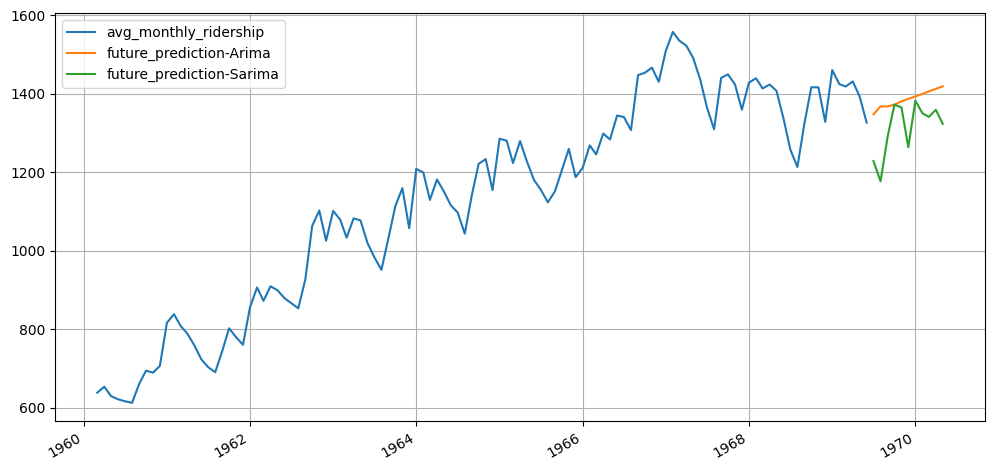

In [42]:
data[['avg_monthly_ridership','future_prediction-Arima','future_prediction-Sarima']].plot(figsize=(12, 6))
plt.grid(True)

**Export model**

In [43]:
#Save model
import joblib

joblib.dump(model_sar, filename='Sarima.pkl')

['Sarima.pkl']